# Life Expectancy Model Training and Evaluation
Team Members: Sanjida Nisha, Nour Elabbasy, and Cindy Weng Zhu


# Imports and Downloads

In [1]:
# Download pre-processed and clean dataset
!gdown "https://drive.google.com/uc?id=1IGF8lLxFA9m-dvpmjqFi0V2quqSiwms_&export=download"

Downloading...
From: https://drive.google.com/uc?id=1IGF8lLxFA9m-dvpmjqFi0V2quqSiwms_&export=download
To: /content/cleaned_Life Expectancy Data.csv
100% 134k/134k [00:00<00:00, 57.3MB/s]


In [2]:
# Download countries integer encoded columns to use for answering data science question
!gdown "https://drive.google.com/uc?id=1OpBXMFcqd21an9FC2G88ODf0VPPLmgwb&export=download"

Downloading...
From: https://drive.google.com/uc?id=1OpBXMFcqd21an9FC2G88ODf0VPPLmgwb&export=download
To: /content/countries_codes.csv
100% 42.5k/42.5k [00:00<00:00, 60.7MB/s]


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv("/content/cleaned_Life Expectancy Data.csv")

In [5]:
countries_codes = pd.read_csv("/content/countries_codes.csv")

# Model Training

Now that our data is clean and preprocessed, we can move on to the model section where first, we will split the dataset into our features and label. The label or target is going to be `Life Expectancy` while our features are all the columns except our target which are `Status`, `Adult Mortality`, `GDP`, `Population`, `Schooling`, and `Country_int`.

In [6]:
# Split dataset into features and label
features = df.loc[:, df.columns != 'Life Expectancy']
label = df['Life Expectancy']

Next, we will split our features and labels datasets into training and testing sections for our model using scikit-learn `train_test_split` method where the training set will have 80% of the dataset, and testing set will have 20% of the dataset. We will also use a random state to keep values constant.

In [7]:
# Split features and label to training and testing
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state=42)

Finally, we will use scikit-learn `LinearRegression` model and train the training section of the features and label.

In [8]:
# Initialize LinearRegression model
reg = LinearRegression()

# Train LinearRegression model
reg.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

Next, we can evaluate how well our model performed. Scikit-Learn's Linear Regression library provide multiple metrics to do so. First, we will use the `score` method which returns the coefficient of determination R^2. 

In [9]:
reg.score(X_test, y_test)

0.7108031684026406

Our Linear Regression model displays a R^2 score of approximately 0.7. This means that there is a decent variance between our features and labels and that most of our datapoints fall closely to the regression line. 

We can use a Predicted vs. Actual plot to further explain this observation.

In [10]:
# Obtain predict values from testing set using predict method
y_pred = reg.predict(X_test)

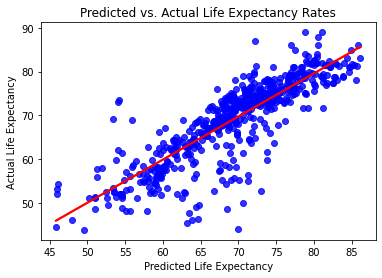

In [11]:
# Use Seaborn's Regplot
ax = sns.regplot(x=y_pred, y=y_test, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Label axes and title
ax.set(xlabel='Predicted Life Expectancy', ylabel='Actual Life Expectancy', title='Predicted vs. Actual Life Expectancy Rates')
plt.show()

We can graph the Actual vs. Predicted Life Expectancy rate where we can observe how closely our actual and predicted life expectancy rate from the dataset and the results from the model. Most of our datapoints are very close to the regression line which means that most of our predicted life expectancy rate correspond to the actual life expectancy rate.

Additionally, Scikit-Learn provides multiple evaluation metrics to use. We will be using the Mean Squared Error (MSE) methods to evaluate our model.

In [12]:
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE): 25.054647586183645


Our model shows a MSE of 25. MSE measures the average of a set of errors and it let us knows how fit our line is to our data. Our MSE is low which shows that many of the datapoints can fit into our line of best fit but not all of them.

Finally, we should also take a look at the residuals with the help of Seaborn's `residplot` method:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


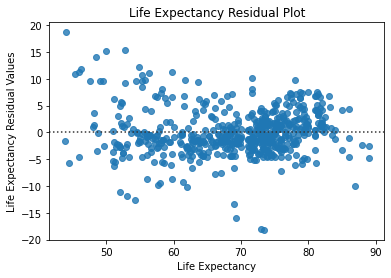

In [13]:
# Seaborn's Residplot
ax = sns.residplot(y_test, y_pred)

# Label axes and title
ax.set(xlabel='Life Expectancy', ylabel='Life Expectancy Residual Values', title='Life Expectancy Residual Plot')
plt.show()

For a decent linear regression, the residual plot would show a random scatter of datapoints. For our model, we have somewhat of a random scatter but it shows more of a pattern than random. Since our model had an R^2 score of approximately 70, there is still room for improvement if we had more time for our project.

# Answering our data science question

Recall that the question we are trying to answer for this project is: How much is the life expectancy rate for densely populated countries. We can use our dataset and our model to answer this question. 

From our dataset, we can pick two countries with differences in population and compare their life expectancies. Let us compare the country with the highest population and the country with the lowest population. Since our cleaned DataFrame contains the integer-encoded countries, we can consult our DataFrame that we created during the ETL process to find out what countries these are.

In [14]:
most_populated = df[df.Population == df.Population.max()]
most_populated

,Status,Life Expectancy,Adult Mortality,GDP,Population,Schooling,Country_int
560,0,76.1,85.0,869.211938,1.371220e+09,13.5,34


In [15]:
least_populated = df[df.Population == df.Population.min()]
least_populated

,Status,Life Expectancy,Adult Mortality,GDP,Population,Schooling,Country_int
1812,0,69.224932,164.796448,136.18321,10208.0,9.6,117


Now we have the integer-encoded countries, we can find out the assigned countries:

In [16]:
print(countries_codes[countries_codes['Country_int'] == 34].head(1))
print(countries_codes[countries_codes['Country_int'] == 117].head(1))

    Country  Country_int
560   China           34
     Country  Country_int
1812   Nauru          117


According to our data, the most populated country is China with approximately 1.3B and the least populated country is Nauru with 10208.

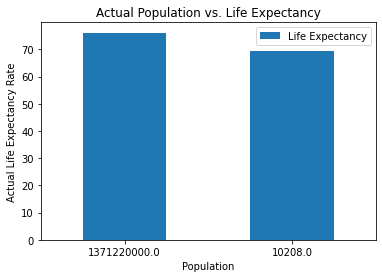

In [23]:
ax = most_populated.append(least_populated).plot.bar(x='Population', y='Life Expectancy', rot=0)
ax.set_xlabel("Population")
ax.set_ylabel("Actual Life Expectancy Rate")
ax.set_title("Actual Population vs. Life Expectancy")
plt.show()

From the code and the graph, we can see that China with a 1.3B population has a higher life expectancy rate than Nauru with a 10K population. Thus, from our data, we can conclude that densely populated countries have a higher life expectancy rate.

Let's use the model we built to answer (and support) our data science question. For this, we decided to pick a country and change the `Population` column keeping all other variables constant and see how our model predicts its life expectancy rate. We decided to use United States and we need to find its country integer coded number.

In [18]:
# Get the country integer code
countries_codes[countries_codes['Country'] == 'United States of America'].head(1)

,Country,Country_int
2794,United States of America,184


In [19]:
# Create a DataFrame with values and increase population while other variables are constant
united_states = pd.DataFrame({
    'Status':1,
    'Adult Mortality': [13,13,13,13,13],
    'GDP': [7483.158469,7483.158469,7483.158469,7483.158469,7483.158469],
    'Population': [320738994,330738994,340738994,350738994,360738994],
    'Schooling':[11.992793,11.992793,11.992793,11.992793,11.992793],
    'Country_int': [184,184,184,184,184]
})
united_states

,Status,Adult Mortality,GDP,Population,Schooling,Country_int
0,1,13,7483.158469,320738994,11.992793,184
1,1,13,7483.158469,330738994,11.992793,184
2,1,13,7483.158469,340738994,11.992793,184
3,1,13,7483.158469,350738994,11.992793,184
4,1,13,7483.158469,360738994,11.992793,184


In [20]:
# Predict life expectancy of the DataFrame we just created
life_exp = reg.predict(united_states)

In [21]:
# Append the predictions as a column on the Dataframe
united_states['Life Expectancy'] = life_exp
united_states

,Status,Adult Mortality,GDP,Population,Schooling,Country_int,Life Expectancy
0,1,13,7483.158469,320738994,11.992793,184,77.033361
1,1,13,7483.158469,330738994,11.992793,184,77.048526
2,1,13,7483.158469,340738994,11.992793,184,77.063690
3,1,13,7483.158469,350738994,11.992793,184,77.078855
4,1,13,7483.158469,360738994,11.992793,184,77.094020


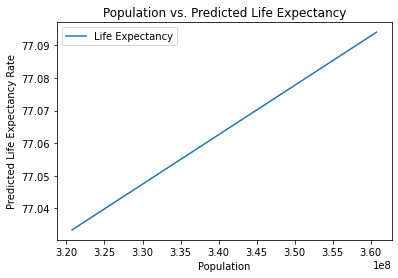

In [22]:
# Plot population and its predicted life expectancy 
ax = united_states.plot.line(x='Population', y='Life Expectancy')
ax.set_xlabel("Population")
ax.set_ylabel("Predicted Life Expectancy Rate")
ax.set_title("Population vs. Predicted Life Expectancy")
plt.show()

As we can see in the DataFrame and the graph, when we increase the population (in other words, making the population denser), the rate of life expectancy increases (although by very little).

In conclusion, more densely populated countries have a higher life expectancy according to our model predictions and the data provided. Although other factors within our dataset affect the life expectancy rate more than population density, we can still observe how population density might affect it when keeping other variables constant. The reason why an increased population causes an increase in life expectancy rate might be because as the population increases for a country, there might be more resources and opportunities for its population such as health resources, economy increases, etc. So, population density affects other factors such as health factors and socio economic factors which can directly affect life expectancy rates in a country.